# Neural Network Implementation: simulated data, without Dropout

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py
import keras
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Using TensorFlow backend.


-----

## The model:

In [2]:
# Fit model according to specification in paper
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras.optimizers import SGD
import keras.backend as K
from keras.callbacks import Callback
from keras.callbacks import LearningRateScheduler

# Euclidean loss function--obtained from:
# http://www.riptutorial.com/keras/example/32022/euclidean-distance-loss
def euclidean_distance_loss(y_true, y_pred):
    """
    Euclidean distance loss
    https://en.wikipedia.org/wiki/Euclidean_distance
    :param y_true: TensorFlow/Theano tensor
    :param y_pred: TensorFlow/Theano tensor of the same shape as y_true
    :return: float
    """
    return K.sqrt(K.sum(K.square(y_pred - y_true), axis=-1))

# Implement learning rate schedule
# Adapted from examples at https://machinelearningmastery.com/using-learning-rate-schedules-deep-learning-models-python-keras/
def learning_schedule(epoch):
    base_lrate = 5e-3
    gamma = 0.0001
    p = 0.25
    lrate = base_lrate * (1 + gamma*272*epoch)**(-p)
    return lrate

# Based off of examples from:
# 1. https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/
# 2. https://keras.io/getting-started/sequential-model-guide/#compilation

# Create NN dropout model
def create_model():
    # Create model
    model = Sequential()
    # Layer 1
    model.add(Dense(24, input_dim=1, kernel_initializer='lecun_uniform', activation='relu'))
   
    # Layer 2
    model.add(Dense(24, kernel_initializer='lecun_uniform',
                    activation='relu', use_bias=False))
   
    # Layer 3
    model.add(Dense(24, kernel_initializer='lecun_uniform',
                    activation='relu', use_bias=False))
   
    # Layer 4
    model.add(Dense(24, kernel_initializer='lecun_uniform',
                    activation='relu', use_bias=False))
    # Layer 5
    model.add(Dense(1, kernel_initializer='lecun_uniform'))
    
    # Compile model
    sgd = SGD(lr=5e-3, momentum=0.9, decay=5e-7, nesterov=False)
    model.compile(loss=euclidean_distance_loss, optimizer=sgd)
    return model

# Save predictions from every epoch
# Code from: https://stackoverflow.com/questions/36895627/python-keras-creating-a-callback-with-one-prediction-for-each-epoch?noredirect=1&lq=1


## Simulate the data:

In [67]:
xs = np.linspace(-0.5, .5, 200)*2*np.pi
ys = -np.cos(xs)

train_mask = [False if i in range(20, 40) 
                   or i in range(80, 100) 
                   or i in range(130, 150)
              else True 
              for i in range(len(xs))]
test_mask = [not e for e in train_mask]

xs_train, ys_train = xs[train_mask], ys[train_mask]
xs_test, ys_test = xs[test_mask], ys[test_mask]

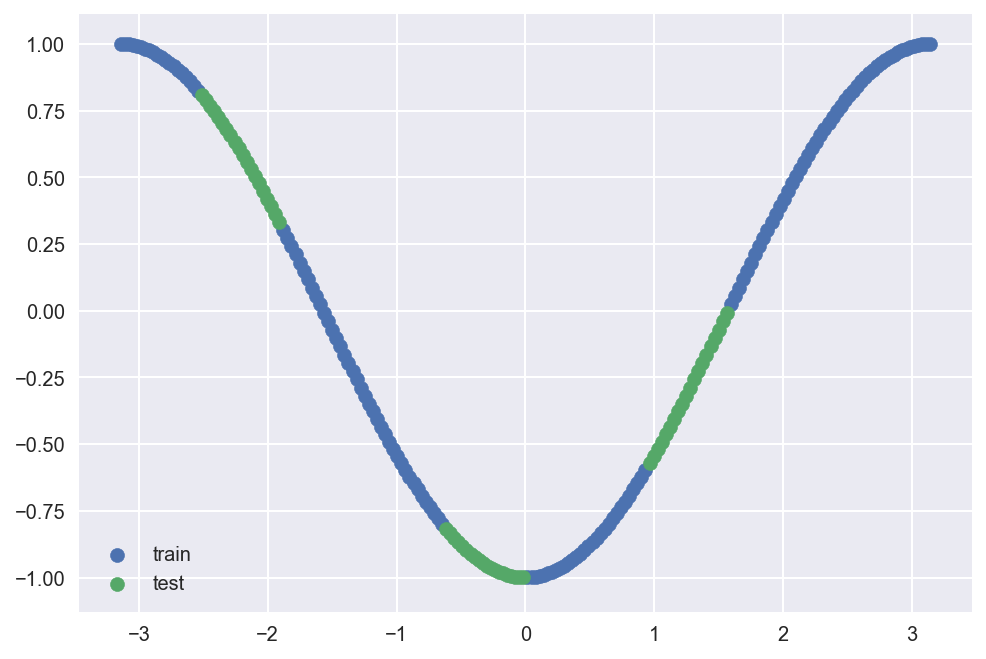

In [68]:
plt.scatter(xs_train, ys_train, label='train')
plt.scatter(xs_test, ys_test, label='test')
plt.legend();

In [70]:
class sim_prediction_history(Callback):
    def __init__(self):
        self.predhis = []
    def on_epoch_end(self, epoch, logs={}):
        self.predhis.append(sim_model.predict(xs))

nepochs = 100
predictions=sim_prediction_history()
lrate = LearningRateScheduler(learning_schedule)
callbacks_list = [predictions, lrate]

sim_model = create_model()
sim_model.fit(x=xs_train, y=ys_train, epochs=nepochs, batch_size=1, callbacks=callbacks_list)

Epoch 1/100
140/140 [==============================] - 0s 3ms/step - loss: 0.4521
Epoch 2/100
140/140 [==============================] - 0s 1ms/step - loss: 0.2549
Epoch 3/100
140/140 [==============================] - 0s 1ms/step - loss: 0.2379
Epoch 4/100
140/140 [==============================] - 0s 1ms/step - loss: 0.3481
Epoch 5/100
140/140 [==============================] - 0s 1ms/step - loss: 0.2736
Epoch 6/100
140/140 [==============================] - 0s 1ms/step - loss: 0.3239
Epoch 7/100
140/140 [==============================] - 0s 1ms/step - loss: 0.2252
Epoch 8/100
140/140 [==============================] - 0s 1ms/step - loss: 0.3696
Epoch 9/100
140/140 [==============================] - 0s 1ms/step - loss: 0.1911
Epoch 10/100
140/140 [==============================] - 0s 1ms/step - loss: 0.2566
Epoch 11/100
140/140 [==============================] - 0s 1ms/step - loss: 0.2175
Epoch 12/100
140/140 [==============================] - 0s 1ms/step - loss: 0.2109
Epoch 13/100


In [71]:
ys_pred = sim_model.predict(xs)

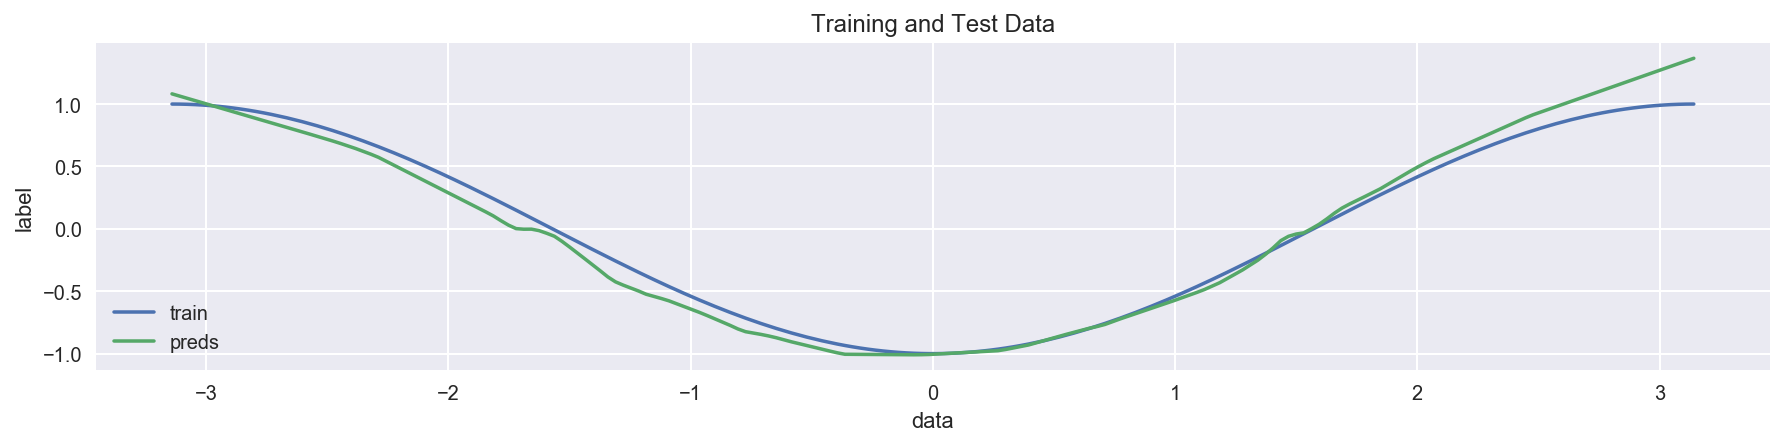

In [72]:
plt.style.use('seaborn')
plt.figure(figsize=(15, 3))
plt.plot(xs, ys, label='train')
plt.plot(xs, ys_pred, label='preds')
plt.xlabel('data')
plt.ylabel('label')
plt.title('Training and Test Data')
plt.legend()
plt.show()